In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.model_selection import cross_val_score

from bikesharing.ml_logic.model import get_folds, train_test_indices
from bikesharing.interface.main import *

In [2]:
preprocess()


Preprocessing Data...

Load rental_data from local CSV...


/Users/azetxxx/Documents/Obsidian_Vault/Le_Wagon/08_week_wagon/group_project/shoefer987/bike_sharing_demand/bikesharing/ml_logic/data.py:33: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cache_path, header='infer' if data_has_header else None)


✅ Data loaded, with shape (2804147, 10)

Load weather_data from local CSV...
✅ Data loaded, with shape (35064, 6)
X_shape: (35040, 14)
y_shape: (35040, 34)


(       temperature_2m  relativehumidity_2m  apparent_temperature  \
 0            0.355408             1.000000              0.342007   
 1            0.357616             0.987013              0.340149   
 2            0.359823             1.000000              0.336431   
 3            0.359823             0.987013              0.332714   
 4            0.359823             1.000000              0.332714   
 ...               ...                  ...                   ...   
 35035        0.426049             0.779221              0.405204   
 35036        0.412804             0.779221              0.395911   
 35037        0.410596             0.753247              0.390335   
 35038        0.417219             0.714286              0.390335   
 35039        0.415011             0.701299              0.394052   
 
        windspeed_10m  precipitation  hour_sin  hour_cos  month_sin  month_cos  \
 0           0.227848       0.017391  0.629410  0.982963       0.75   0.933013   
 1    

In [3]:
df_X = pd.read_csv('~/.lewagon/bikesharing/data/processed/X_processed_from_2019_to_2022.csv')
df_y = pd.read_csv('~/.lewagon/bikesharing/data/processed/y_processed_from_2019_to_2022.csv')


In [251]:
df_X

,temperature_2m,relativehumidity_2m,apparent_temperature,windspeed_10m,precipitation,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,is_holiday,is_weekend
0,0.355408,1.000000,0.342007,0.227848,0.017391,0.629410,0.982963,0.75,0.933013,0.600779,0.989739,1,0
1,0.357616,0.987013,0.340149,0.245570,0.008696,0.750000,0.933013,0.75,0.933013,0.600779,0.989739,1,0
2,0.359823,1.000000,0.336431,0.303797,0.017391,0.853553,0.853553,0.75,0.933013,0.600779,0.989739,1,0
3,0.359823,0.987013,0.332714,0.341772,0.008696,0.933013,0.750000,0.75,0.933013,0.600779,0.989739,1,0
4,0.359823,1.000000,0.332714,0.356962,0.000000,0.982963,0.629410,0.75,0.933013,0.600779,0.989739,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,0.426049,0.779221,0.405204,0.202532,0.000000,0.066987,0.750000,0.50,1.000000,0.500000,1.000000,0,1
35036,0.412804,0.779221,0.395911,0.172152,0.000000,0.146447,0.853553,0.50,1.000000,0.500000,1.000000,0,1
35037,0.410596,0.753247,0.390335,0.182278,0.000000,0.250000,0.933013,0.50,1.000000,0.500000,1.000000,0,1
35038,0.417219,0.714286,0.390335,0.222785,0.000000,0.370590,0.982963,0.50,1.000000,0.500000,1.000000,0,1


In [5]:
df_X_y = pd.concat((df_X, df_y) , axis=1)

In [44]:
districts = ['Altstadt-Lehel', 'Au - Haidhausen',
            'Aubing-Lochhausen-Langwied', 
            'Berg am Laim', 'Bogenhausen',
            'Feldmoching', 
            'Hadern', 'Harlaching', 
            'Hasenbergl-Lerchenau Ost',
            'Laim', 'Lochhausen', 'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt',
            'Milbertshofen-Am Hart', 'Moosach', 'Neuhausen-Nymphenburg',
            'Obergiesing', 
            'Obermenzing', 
            'Obersendling', 'Pasing',
            'Pasing-Obermenzing', 'Ramersdorf-Perlach', 'Schwabing-Freimann',
            'Schwabing-West', 'Schwanthalerhöhe', 'Sendling', 'Sendling-Westpark',
            'Südgiesing', 'Thalkirchen', 'Trudering', 'Trudering-Riem',
            'Untergiesing', 'Untergiesing-Harlaching', 
            'Untermenzing-Allach'
        ]

In [8]:
fold_dfs = get_folds(df_X_y, fold_length=FOLD_LENGTH, fold_stride=FOLD_STRIDE)

In [45]:
districts

['Altstadt-Lehel',
 'Au - Haidhausen',
 'Aubing-Lochhausen-Langwied',
 'Berg am Laim',
 'Bogenhausen',
 'Feldmoching',
 'Hadern',
 'Harlaching',
 'Hasenbergl-Lerchenau Ost',
 'Laim',
 'Lochhausen',
 'Ludwigsvorstadt-Isarvorstadt',
 'Maxvorstadt',
 'Milbertshofen-Am Hart',
 'Moosach',
 'Neuhausen-Nymphenburg',
 'Obergiesing',
 'Obermenzing',
 'Obersendling',
 'Pasing',
 'Pasing-Obermenzing',
 'Ramersdorf-Perlach',
 'Schwabing-Freimann',
 'Schwabing-West',
 'Schwanthalerhöhe',
 'Sendling',
 'Sendling-Westpark',
 'Südgiesing',
 'Thalkirchen',
 'Trudering',
 'Trudering-Riem',
 'Untergiesing',
 'Untergiesing-Harlaching',
 'Untermenzing-Allach']

In [200]:
from sklearn.metrics import r2_score,mean_squared_error

In [209]:
models = []
district_score_means = []

for dist in districts:
    scores_list = []

    indices = [0, 1, 2, 3]
        
    for id in range(4):
        model = LinearRegression()

        test_df = fold_dfs[id]
        train_folds = [fold_dfs[i] for i in indices if i != id]
        
        train_df = pd.concat(train_folds, axis=0)
        X_test = test_df.drop(columns= districts)
        y_test = test_df[dist]
        X_train = train_df.drop(columns= districts)
        y_train = train_df[dist]
        

        model.fit(X_train, y_train)
        y_pred = [x if x >= 0 else 0 for x in model.predict(X_test)]
        # scores = r2_score(y_test , y_pred)
        scores = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
        scores_list.append(scores)
        print(f"{id} >>> scores={scores_list}")
        
        
    scores_array = np.array(scores)
    district_score_means.append(np.mean(scores_array.flatten()))

0 >>> scores=[6.440970253097569]
1 >>> scores=[6.440970253097569, 6.621685019687418]
2 >>> scores=[6.440970253097569, 6.621685019687418, 5.351922327811665]
3 >>> scores=[6.440970253097569, 6.621685019687418, 5.351922327811665, 5.743682559083987]
0 >>> scores=[3.0032166328273524]
1 >>> scores=[3.0032166328273524, 3.15941675838006]
2 >>> scores=[3.0032166328273524, 3.15941675838006, 2.8266974331084356]
3 >>> scores=[3.0032166328273524, 3.15941675838006, 2.8266974331084356, 3.1351043482766854]
0 >>> scores=[0.7650065131272148]
1 >>> scores=[0.7650065131272148, 0.9283544934324438]
2 >>> scores=[0.7650065131272148, 0.9283544934324438, 0.5816008156160317]
3 >>> scores=[0.7650065131272148, 0.9283544934324438, 0.5816008156160317, 0.4737804894770731]
0 >>> scores=[1.4298486008695923]
1 >>> scores=[1.4298486008695923, 1.4535416253309665]
2 >>> scores=[1.4298486008695923, 1.4535416253309665, 1.2589131210338667]
3 >>> scores=[1.4298486008695923, 1.4535416253309665, 1.2589131210338667, 1.3479245757

In [210]:
scores_df = pd.DataFrame(district_score_means, columns=['score'], index=districts)

In [211]:
scores_df

,score
Altstadt-Lehel,5.743683
Au - Haidhausen,3.135104
Aubing-Lochhausen-Langwied,0.473780
Berg am Laim,1.347925
Bogenhausen,2.177819
Feldmoching,0.162730
Hadern,0.875127
Harlaching,0.490463
Hasenbergl-Lerchenau Ost,0.238754
Laim,1.552502


In [212]:
scores_df.sort_values(by=['score'], inplace=True) 


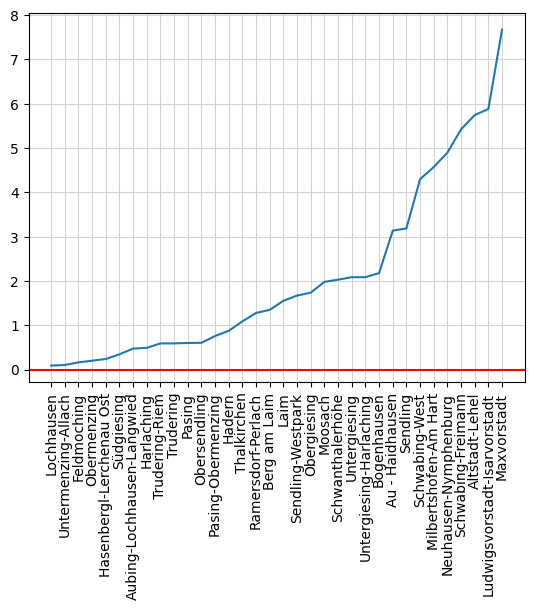

In [213]:
plt.plot(scores_df.index, scores_df['score'])
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(c="#d3d3d3")


plt.show()

In [214]:
print(f"mean = {np.mean(district_score_means)}")
print(f"min = {np.min(district_score_means)}")
print(f"max = {np.max(district_score_means)}")

mean = 2.057580393057698
min = 0.0894770408026577
max = 7.673070813186392


In [38]:
# MSE

In [ ]:
# # Prediction for 2024-02-01 12:00
# X_new # Weather prediction data for 2024-02-01 12:00
# rent_date_hour_new # pick date_time for prediction
# y_new = model.predict(X_new)


# def bike_demand_predict(X_new, rent_date_hour):
#     y_new = [] # List of rent_number for each district
#     for district in districts:
#         model.predict()

In [52]:
# model = LinearRegression()
# scores = []
# indices = [0, 1, 2, 3]

# test_df = fold_dfs[0]
# train_folds = [fold_dfs[i] for i in indices if i != 0]
# train_df = pd.concat(train_folds, axis=0)
# X_test = test_df.drop(columns= districts)
# y_test = test_df['Maxvorstadt']
# X_train = train_df.drop(columns= districts)
# y_train = train_df['Maxvorstadt']


### Map with district scores

In [245]:
from geopandas import GeoDataFrame
from shapely import Polygon

import datetime
import numpy as np
import pandas as pd
import plotly.express as px
import requests
import streamlit as st

In [246]:
df_polygons = pd.read_csv(r'../raw_data/polygons.csv')

In [247]:
df_polygons.head(3)

,district,coordinates
0,Maxvorstadt,"[[11.5389232, 48.1427959], [11.5401833, 48.142..."
1,Schwabing-West,"[[11.5496316, 48.1606824], [11.5496383, 48.160..."
2,Au - Haidhausen,"[[11.5693244, 48.1222148], [11.5694112, 48.122..."


In [248]:
def parse_string_to_array(string):
    string = string.replace("], [", "],[")
    string = string.replace(", ", ",")
    string = string[2:-2]  # Remove the outermost square brackets

    coordinate_strings = string.split("],[")  # Split the remaining string

    coordinates = []

    for coordinate_string in coordinate_strings:
        # Split the coordinate string into latitude and longitude values
        lat_lon = coordinate_string.split(",")
        print(f"{lat_lon=}")
        # Convert the latitude and longitude values to floats
        lat = float(lat_lon[0])
        lon = float(lat_lon[1])
        # Create a coordinate list [latitude, longitude]
        coordinate = [lat, lon]
        # Append the coordinate to the list of coordinates
        coordinates.append(coordinate)

    return coordinates


In [249]:
df_polygons['coordinates'] = df_polygons['coordinates'].apply(parse_string_to_array)

lat_lon=['11.5389232', '48.1427959]', '[11.5401833', '48.1426956]', '[11.5423166', '48.1425407]', '[11.5441658', '48.1424036]', '[11.5452036', '48.1423275]', '[11.5475257', '48.1421496]', '[11.5484296', '48.1420785]', '[11.548437', '48.1421146]', '[11.5484493', '48.1421219]', '[11.5484651', '48.1422374]', '[11.5485179', '48.1425621]', '[11.5485616', '48.142821]', '[11.5485312', '48.1428456]', '[11.5486167', '48.1433407]', '[11.5485279', '48.1434313]', '[11.5484239', '48.14351]', '[11.5484813', '48.1436281]', '[11.5500333', '48.1432805]', '[11.5505423', '48.1431655]', '[11.5520146', '48.1428592]', '[11.5540524', '48.1424418]', '[11.5548224', '48.1422815]', '[11.5557695', '48.1420824]', '[11.5561588', '48.1420503]', '[11.5567314', '48.1420084]', '[11.5568378', '48.1419999]', '[11.5578409', '48.1417824]', '[11.5590423', '48.1415234]', '[11.559641', '48.1413928]', '[11.5602881', '48.1412574]', '[11.5607382', '48.1411604]', '[11.5610791', '48.1410112]', '[11.5613864', '48.1409287]', '[11.56

ValueError: could not convert string to float: '48.1427959]'

In [29]:
df_polygons.set_index('district', inplace=True)
df_polygons.head(3)

,coordinates
district,
Maxvorstadt,"[[11.5389232, 48.1427959], [11.5401833, 48.142..."
Schwabing-West,"[[11.5496316, 48.1606824], [11.5496383, 48.160..."
Au - Haidhausen,"[[11.5693244, 48.1222148], [11.5694112, 48.122..."


In [35]:
districts = list(df_polygons.index)

In [93]:
index_values = districts
district_polys = pd.DataFrame(index=index_values)

In [113]:
def get_polygons(coords):
    polygon = Polygon(coords)
    return polygon

In [92]:
df_polygons

,coordinates
district,
Maxvorstadt,"[[11.5389232, 48.1427959], [11.5401833, 48.142..."
Schwabing-West,"[[11.5496316, 48.1606824], [11.5496383, 48.160..."
Au - Haidhausen,"[[11.5693244, 48.1222148], [11.5694112, 48.122..."
Sendling,"[[11.5354245, 48.1298569], [11.5356268, 48.129..."
Schwanthalerhöhe,"[[11.5259667, 48.1365504], [11.5260254, 48.136..."
Moosach,"[[11.833186, 48.044378], [11.8331875, 48.04435..."
Berg am Laim,"[[11.6010786, 48.1243742], [11.6019663, 48.123..."
Trudering,"[[11.6436919, 48.1150839], [11.644378, 48.1146..."
Ramersdorf,"[[7.1402655, 50.7183875], [7.1431597, 50.71771..."


In [95]:
# Add scores of districts
district_polys = pd.concat([district_polys, scores_df], axis=1)

In [96]:
district_polys

,score
Altstadt-Lehel,-38.782892
Au - Haidhausen,-9.006362
Aubing-Lochhausen-Langwied,-0.574814
Berg am Laim,-1.916321
Bogenhausen,-5.871347
Feldmoching,-0.104254
Hadern,-1.159233
Harlaching,-0.310981
Hasenbergl-Lerchenau Ost,-0.187529
Laim,-2.984080


In [97]:
# Convert coordinates to polygons
district_polys['geo_polygon'] = district_polys['geo_polygon'].apply(get_polygons)

KeyError: 'geo_polygon'

In [36]:
district_polys.head(3)

""
Maxvorstadt
Schwabing-West
Au - Haidhausen


In [85]:
district_polys.head(3)

,score
Altstadt-Lehel,-38.782892
Au - Haidhausen,-9.006362
Aubing-Lochhausen-Langwied,-0.574814


In [86]:

# Initiating GeoDataFrame
gdf = GeoDataFrame(district_polys, crs="EPSG:4326", geometry='geo_polygon')


# >>>>> MAP <<<<<
# Plot map with polygons
fig = px.choropleth_mapbox(gdf,
                           geojson=gdf.geometry,
                           locations=gdf.index,
                           color='score',
                           color_continuous_scale='RdBu',
                           range_color=(-2, 1),
                           mapbox_style="open-street-map", # carto-positron
                           zoom=10,
                           opacity=0.5,
                           center = {"lat": 48.1351, "lon": 11.5820})

# fig.show()
st.plotly_chart(fig, use_container_width=False, sharing="streamlit", theme="streamlit")


ValueError: Unknown column geo_polygon